In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("/Users/prateekprajapati/Documents/electric_vehicle_analytics.csv")
df.head()

,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,233,8.10,-9.0,Personal,14.13,969,843,0.30,375.55,26483
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,221,9.83,1.6,Personal,19.41,1157,1186,0.25,532.02,11287
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,138,3.60,1.5,Fleet,29.39,291,1890,0.26,1291.68,34023
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,192,8.97,12.5,Fleet,6.96,401,2481,0.33,234.44,14398
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,189,7.03,-3.0,Commercial,2.06,214,2336,0.10,32.61,23033


In [3]:
df.columns

Index(['Vehicle_ID', 'Make', 'Model', 'Year', 'Region', 'Vehicle_Type',
       'Battery_Capacity_kWh', 'Battery_Health_%', 'Range_km',
       'Charging_Power_kW', 'Charging_Time_hr', 'Charge_Cycles',
       'Energy_Consumption_kWh_per_100km', 'Mileage_km', 'Avg_Speed_kmh',
       'Max_Speed_kmh', 'Acceleration_0_100_kmh_sec', 'Temperature_C',
       'Usage_Type', 'CO2_Saved_tons', 'Maintenance_Cost_USD',
       'Insurance_Cost_USD', 'Electricity_Cost_USD_per_kWh',
       'Monthly_Charging_Cost_USD', 'Resale_Value_USD'],
      dtype='object')

In [4]:
df.columns=(
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)
df.columns

Index(['vehicle_id', 'make', 'model', 'year', 'region', 'vehicle_type',
       'battery_capacity_kwh', 'battery_health_%', 'range_km',
       'charging_power_kw', 'charging_time_hr', 'charge_cycles',
       'energy_consumption_kwh_per_100km', 'mileage_km', 'avg_speed_kmh',
       'max_speed_kmh', 'acceleration_0_100_kmh_sec', 'temperature_c',
       'usage_type', 'co2_saved_tons', 'maintenance_cost_usd',
       'insurance_cost_usd', 'electricity_cost_usd_per_kwh',
       'monthly_charging_cost_usd', 'resale_value_usd'],
      dtype='object')

In [5]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types\n",df.dtypes)
df.describe(include="all")

Shape: (3000, 25)

Missing Values:
 vehicle_id                          0
make                                0
model                               0
year                                0
region                              0
vehicle_type                        0
battery_capacity_kwh                0
battery_health_%                    0
range_km                            0
charging_power_kw                   0
charging_time_hr                    0
charge_cycles                       0
energy_consumption_kwh_per_100km    0
mileage_km                          0
avg_speed_kmh                       0
max_speed_kmh                       0
acceleration_0_100_kmh_sec          0
temperature_c                       0
usage_type                          0
co2_saved_tons                      0
maintenance_cost_usd                0
insurance_cost_usd                  0
electricity_cost_usd_per_kwh        0
monthly_charging_cost_usd           0
resale_value_usd                    0
dtype: int64



,vehicle_id,make,model,year,region,vehicle_type,battery_capacity_kwh,battery_health_%,range_km,charging_power_kw,...,max_speed_kmh,acceleration_0_100_kmh_sec,temperature_c,usage_type,co2_saved_tons,maintenance_cost_usd,insurance_cost_usd,electricity_cost_usd_per_kwh,monthly_charging_cost_usd,resale_value_usd
count,3000.000000,3000,3000,3000.000000,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
unique,NaN,10,23,NaN,4,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ford,Niro EV,NaN,Australia,Hatchback,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Personal,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,323,163,NaN,794,773,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1020,NaN,NaN,NaN,NaN,NaN,NaN
mean,1500.500000,NaN,NaN,2019.499667,NaN,NaN,74.810100,85.030000,374.414667,129.301000,...,190.678333,6.707073,14.794133,NaN,15.025163,1104.199000,1495.469333,0.216467,418.814683,22257.038000
std,866.169729,NaN,NaN,2.848047,NaN,NaN,25.734079,8.589526,137.184112,68.742745,...,35.184232,1.880355,14.407087,NaN,8.455850,521.530356,585.919978,0.078383,312.389226,5594.979382
min,1.000000,NaN,NaN,2015.000000,NaN,NaN,30.000000,70.000000,121.000000,11.100000,...,130.000000,3.500000,-10.000000,NaN,0.610000,200.000000,500.000000,0.080000,7.990000,8506.000000
25%,750.750000,NaN,NaN,2017.000000,NaN,NaN,53.000000,77.775000,260.000000,70.900000,...,159.000000,5.080000,2.400000,NaN,7.817500,652.000000,984.750000,0.150000,175.485000,17813.000000
50%,1500.500000,NaN,NaN,2020.000000,NaN,NaN,74.850000,85.250000,371.000000,126.700000,...,191.500000,6.720000,14.550000,NaN,15.115000,1109.000000,1496.000000,0.220000,347.285000,22154.000000
75%,2250.250000,NaN,NaN,2022.000000,NaN,NaN,96.900000,92.300000,476.250000,187.975000,...,222.000000,8.310000,27.500000,NaN,22.170000,1569.000000,2019.250000,0.280000,595.152500,26732.750000


In [6]:
df.columns

Index(['vehicle_id', 'make', 'model', 'year', 'region', 'vehicle_type',
       'battery_capacity_kwh', 'battery_health_%', 'range_km',
       'charging_power_kw', 'charging_time_hr', 'charge_cycles',
       'energy_consumption_kwh_per_100km', 'mileage_km', 'avg_speed_kmh',
       'max_speed_kmh', 'acceleration_0_100_kmh_sec', 'temperature_c',
       'usage_type', 'co2_saved_tons', 'maintenance_cost_usd',
       'insurance_cost_usd', 'electricity_cost_usd_per_kwh',
       'monthly_charging_cost_usd', 'resale_value_usd'],
      dtype='object')

In [7]:
numeric_cols = [
    'year',
    'battery_capacity_kwh',
    'battery_health_%',
    'range_km',
    'charging_power_kw',
    'charging_time_hr',
    'charge_cycles',
    'energy_consumption_kwh_per_100km',
    'mileage_km',
    'avg_speed_kmh',
    'max_speed_kmh',
    'acceleration_0_100_kmh_sec',
    'temperature_c',
    'co2_saved_tons',
    'maintenance_cost_usd',
    'insurance_cost_usd',
    'electricity_cost_usd_per_kwh',
    'monthly_charging_cost_usd',
    'resale_value_usd'
]

for col in numeric_cols:
    if col in df.columns:
        df[col]=pd.to_numeric(df[col], errors='coerce')
df.dtypes

vehicle_id                            int64
make                                 object
model                                object
year                                  int64
region                               object
vehicle_type                         object
battery_capacity_kwh                float64
battery_health_%                    float64
range_km                              int64
charging_power_kw                   float64
charging_time_hr                    float64
charge_cycles                         int64
energy_consumption_kwh_per_100km    float64
mileage_km                            int64
avg_speed_kmh                       float64
max_speed_kmh                         int64
acceleration_0_100_kmh_sec          float64
temperature_c                       float64
usage_type                           object
co2_saved_tons                      float64
maintenance_cost_usd                  int64
insurance_cost_usd                    int64
electricity_cost_usd_per_kwh    

In [8]:
missing_values_summary=df.isnull().sum().sort_values(ascending=False)
missing_values_summary

vehicle_id                          0
mileage_km                          0
monthly_charging_cost_usd           0
electricity_cost_usd_per_kwh        0
insurance_cost_usd                  0
maintenance_cost_usd                0
co2_saved_tons                      0
usage_type                          0
temperature_c                       0
acceleration_0_100_kmh_sec          0
max_speed_kmh                       0
avg_speed_kmh                       0
energy_consumption_kwh_per_100km    0
make                                0
charge_cycles                       0
charging_time_hr                    0
charging_power_kw                   0
range_km                            0
battery_health_%                    0
battery_capacity_kwh                0
vehicle_type                        0
region                              0
year                                0
model                               0
resale_value_usd                    0
dtype: int64

In [9]:
#Filling numeric missing values
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col]=df[col].fillna(df[col].median())

In [10]:
#Filling missing categorial
for col in df.select_dtypes (include=['object']).columns:
    df[col]=df[col].fillna("Unknown")

In [11]:
before=df.shape[0]
af=df.drop_duplicates()
after=df.shape[0]
print(f"Removed duplicates: {before-after}")

Removed duplicates: 0


In [12]:
df.to_csv("ev_cleaned.csv", index=False)
print("saved cleaned file -> ev_cleaned.csv")

saved cleaned file -> ev_cleaned.csv


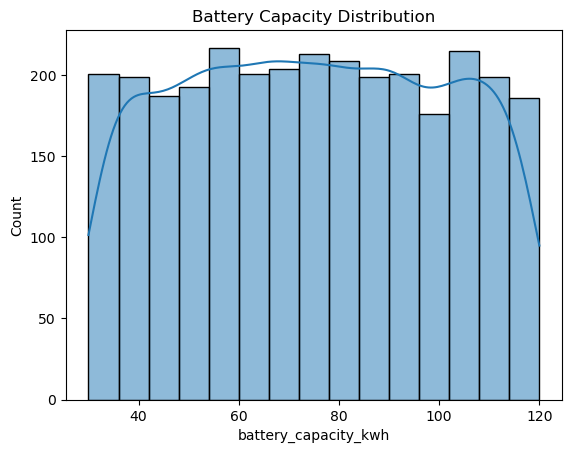

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['battery_capacity_kwh'],kde=True)
plt.title("Battery Capacity Distribution")
plt.show()

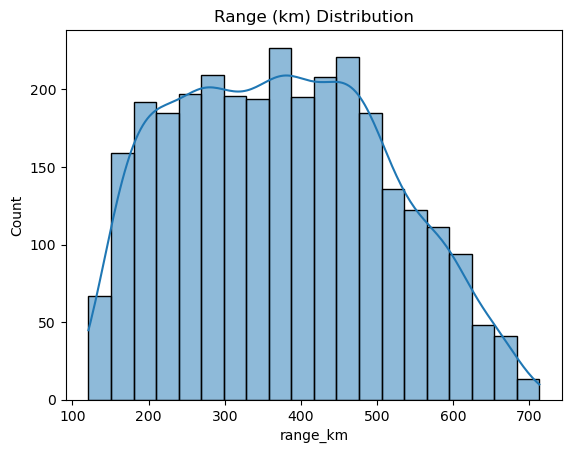

In [14]:
sns.histplot(df['range_km'],kde=True)
plt.title("Range (km) Distribution")
plt.show()

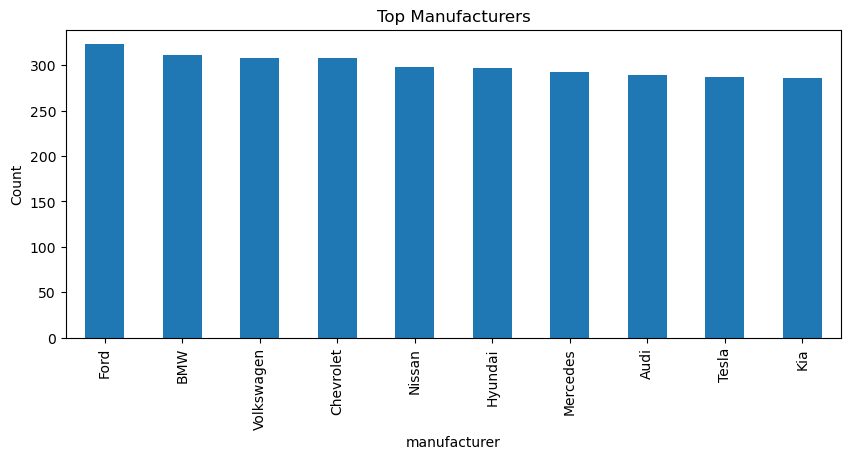

In [29]:
df['manufacturer'].value_counts().head(20).plot(kind='bar', figsize=(10, 4))
plt.title("Top Manufacturers")
plt.ylabel("Count")
plt.show()

In [17]:
df=df.rename(columns={"make":"manufacturer"})

In [28]:
df.head()

,vehicle_id,manufacturer,model,year,region,vehicle_type,battery_capacity_kwh,battery_health_%,range_km,charging_power_kw,...,max_speed_kmh,acceleration_0_100_kmh_sec,temperature_c,usage_type,co2_saved_tons,maintenance_cost_usd,insurance_cost_usd,electricity_cost_usd_per_kwh,monthly_charging_cost_usd,resale_value_usd
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,233,8.10,-9.0,Personal,14.13,969,843,0.30,375.55,26483
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,221,9.83,1.6,Personal,19.41,1157,1186,0.25,532.02,11287
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,138,3.60,1.5,Fleet,29.39,291,1890,0.26,1291.68,34023
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,192,8.97,12.5,Fleet,6.96,401,2481,0.33,234.44,14398
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,189,7.03,-3.0,Commercial,2.06,214,2336,0.10,32.61,23033


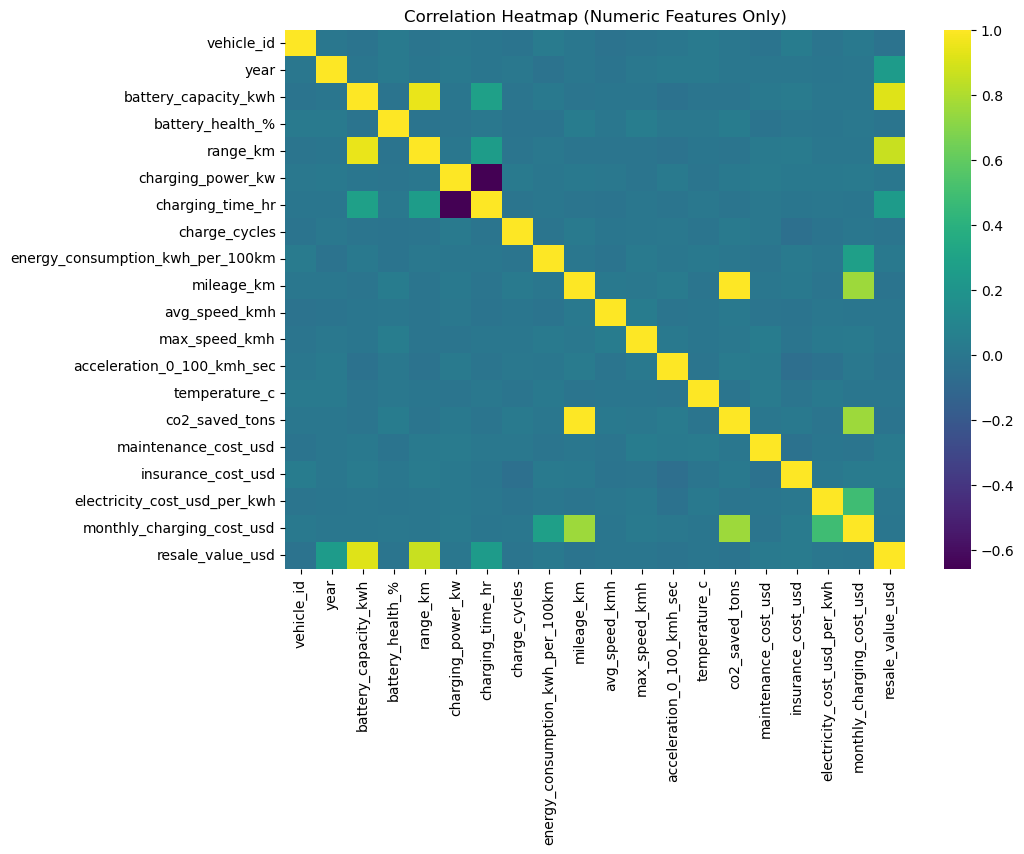

In [37]:
numeric_df=df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), cmap="viridis", annot=False)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()